In [1]:
#If using venv,make sure to swith to correct kernel

In [2]:
import pandas as pd
from datetime import datetime
from pylab import plt, mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [19]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'

In [20]:
# COCOA PRICES From FRED (Federal Reserve Bank of St Louis)
# Global price of Cocoa (PCOCOUSDM)
cocoa_df = pd.read_csv('data/PCOCOUSDM.csv')

cocoa_df['fixed_date'] = cocoa_df['observation_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

cocoa_df = cocoa_df.drop('observation_date', axis=1)

cocoa_df = cocoa_df.rename(columns={"PCOCOUSDM": "cocoa_price"})

cocoa_df.head()

,cocoa_price,fixed_date
0,995.0,1990-01-01
1,1022.0,1990-02-01
2,1131.0,1990-03-01
3,1336.0,1990-04-01
4,1443.0,1990-05-01


In [21]:
# Weather Data of Ghana and Ivory Coast from NOAA
ghana_df = pd.read_csv('data/ghana_weather.csv')
ghana_df['fixed_date'] = ghana_df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
ghana_df = ghana_df.drop('time', axis=1)
ghana_df = ghana_df.rename(
    columns={
        "temperature_2m_mean (°F)": "ghana_temp_mean",
        "temperature_2m_max (°F)": "ghana_temp_max",
        "temperature_2m_min (°F)": "ghana_temp_min",
        "weather_code (wmo code)": "ghana_weather_code",
        "precipitation_sum (inch)": "ghana_precip"
    }
)
ghana_df.head()

,ghana_temp_mean,ghana_temp_max,ghana_temp_min,ghana_weather_code,ghana_precip,fixed_date
0,80.4,91.9,71.1,3,0.0,1990-01-01
1,80.5,93.3,69.0,3,0.0,1990-01-02
2,80.2,93.7,68.7,2,0.0,1990-01-03
3,81.0,93.9,69.0,3,0.0,1990-01-04
4,81.2,94.1,69.9,3,0.0,1990-01-05


In [22]:
# Weather Data of Ghana and Ivory Coast from NOAA
ivory_df = pd.read_csv('data/ivory_coast_weather.csv')
ivory_df['fixed_date'] = ivory_df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
ivory_df = ivory_df.drop('time', axis=1)
ivory_df = ivory_df.rename(
    columns={
        "temperature_2m_mean (°F)": "ivory_temp_mean",
        "temperature_2m_max (°F)": "ivory_temp_max",
        "temperature_2m_min (°F)": "ivory_temp_min",
        "weather_code (wmo code)": "ivory_weather_code",
        "precipitation_sum (inch)": "ivory_precip"
    }
)
ivory_df.head()

,ivory_temp_mean,ivory_temp_max,ivory_temp_min,ivory_weather_code,ivory_precip,fixed_date
0,80.8,93.1,73.5,3,0.000,1990-01-01
1,80.2,91.5,74.0,3,0.000,1990-01-02
2,79.6,90.5,72.8,3,0.000,1990-01-03
3,78.6,87.7,72.9,51,0.008,1990-01-04
4,77.5,88.1,72.6,53,0.028,1990-01-05


In [31]:
# HERSHEYS Stock Price From NASDAQ
hsy_df = pd.read_csv('data/HERSHEYS_HISTORICAL.csv')
hsy_df['fixed_date'] = hsy_df['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
filtered_hsy_df = hsy_df[(hsy_df['fixed_date'] >= datetime.strptime('1990-01-01', '%Y-%m-%d')) & 
       (hsy_df['fixed_date'] <= datetime.strptime('2025-02-01', '%Y-%m-%d'))]
filtered_hsy_df = filtered_hsy_df.drop('Date', axis=1)
filtered_hsy_df = filtered_hsy_df.rename(
    columns={
        "Close/Last": "hsy_close",
        "Volume": "hsy_volume",
        "Open": "hsy_open",
        "High": "hsy_high",
        "Low": "hsy_low"
    }
)
filtered_hsy_df['hsy_close'] = filtered_hsy_df['hsy_close'].apply(lambda x: x.replace(",",".").replace("$", "")).astype(float)
filtered_hsy_df['hsy_open'] = filtered_hsy_df['hsy_open'].apply(lambda x: x.replace(",",".").replace("$", "")).astype(float)
filtered_hsy_df['hsy_high'] = filtered_hsy_df['hsy_high'].apply(lambda x: x.replace(",",".").replace("$", "")).astype(float)
filtered_hsy_df['hsy_low'] = filtered_hsy_df['hsy_low'].apply(lambda x: x.replace(",",".").replace("$", "")).astype(float)


filtered_hsy_df.tail()

,hsy_close,hsy_volume,hsy_open,hsy_high,hsy_low,fixed_date
2512,100.09,853573,100.74,101.16,100.01,2015-04-10
2513,100.74,694402,100.45,100.98,99.90,2015-04-09
2514,100.56,846802,101.71,101.94,100.09,2015-04-08
2515,101.74,675274,101.66,102.56,101.61,2015-04-07
2516,101.50,1151205,100.66,102.10,100.59,2015-04-06


In [27]:
# First, merge the three dataframes on exact date matches
# These use an exact match on the full yyyy-MM-dd format
exact_date_merged = filtered_hsy_df.merge(
    ivory_df,
    on='fixed_date',
    how='inner',
    suffixes=('', '_ivory')
)

# Add ghana_df to the merged dataframe, still using exact date matching
exact_date_merged = exact_date_merged.merge(
    ghana_df,
    on='fixed_date',
    how='inner',
    suffixes=('', '_ghana')
)

# For cocoa_df, we need to match only on year and month
# Create year and month columns for the merged dataframe
exact_date_merged['year'] = exact_date_merged['fixed_date'].dt.year
exact_date_merged['month'] = exact_date_merged['fixed_date'].dt.month

# Create year and month columns for cocoa_df
cocoa_df['year'] = cocoa_df['fixed_date'].dt.year
cocoa_df['month'] = cocoa_df['fixed_date'].dt.month

# Perform the final merge on year and month
final_merged_df = exact_date_merged.merge(
    cocoa_df,
    on=['year', 'month'],
    how='inner',
    suffixes=('', '_cocoa')
)

# Drop the temporary year and month columns if they're not needed
final_merged_df = final_merged_df.drop(['year', 'month'], axis=1)

In [28]:
final_merged_df.head()

,hsy_close,hsy_volume,hsy_open,hsy_high,hsy_low,fixed_date,ivory_temp_mean,ivory_temp_max,ivory_temp_min,ivory_weather_code,ivory_precip,ghana_temp_mean,ghana_temp_max,ghana_temp_min,ghana_weather_code,ghana_precip,cocoa_price,fixed_date_cocoa
0,149.25,1977514,150.00,151.6500,147.6600,2025-01-31,78.6,91.0,67.1,3,0.0,87.3,98.9,75.8,3,0.0,10710.345483,2025-01-01
1,152.14,1669659,150.24,152.2100,149.2000,2025-01-30,79.3,90.8,70.1,3,0.0,85.4,98.5,72.9,3,0.0,10710.345483,2025-01-01
2,149.23,1217296,150.30,150.5500,148.5400,2025-01-29,78.9,89.7,69.8,3,0.0,86.1,98.6,74.5,3,0.0,10710.345483,2025-01-01
3,149.73,1539016,153.73,154.2638,149.3000,2025-01-28,79.7,90.6,71.3,3,0.0,83.9,98.0,68.8,3,0.0,10710.345483,2025-01-01
4,153.72,2309817,153.28,155.5900,152.5001,2025-01-27,78.3,91.8,68.1,3,0.0,83.5,98.7,70.0,2,0.0,10710.345483,2025-01-01


In [29]:
list(final_merged_df.columns)

['hsy_close',
 'hsy_volume',
 'hsy_open',
 'hsy_high',
 'hsy_low',
 'fixed_date',
 'ivory_temp_mean',
 'ivory_temp_max',
 'ivory_temp_min',
 'ivory_weather_code',
 'ivory_precip',
 'ghana_temp_mean',
 'ghana_temp_max',
 'ghana_temp_min',
 'ghana_weather_code',
 'ghana_precip',
 'cocoa_price',
 'fixed_date_cocoa']

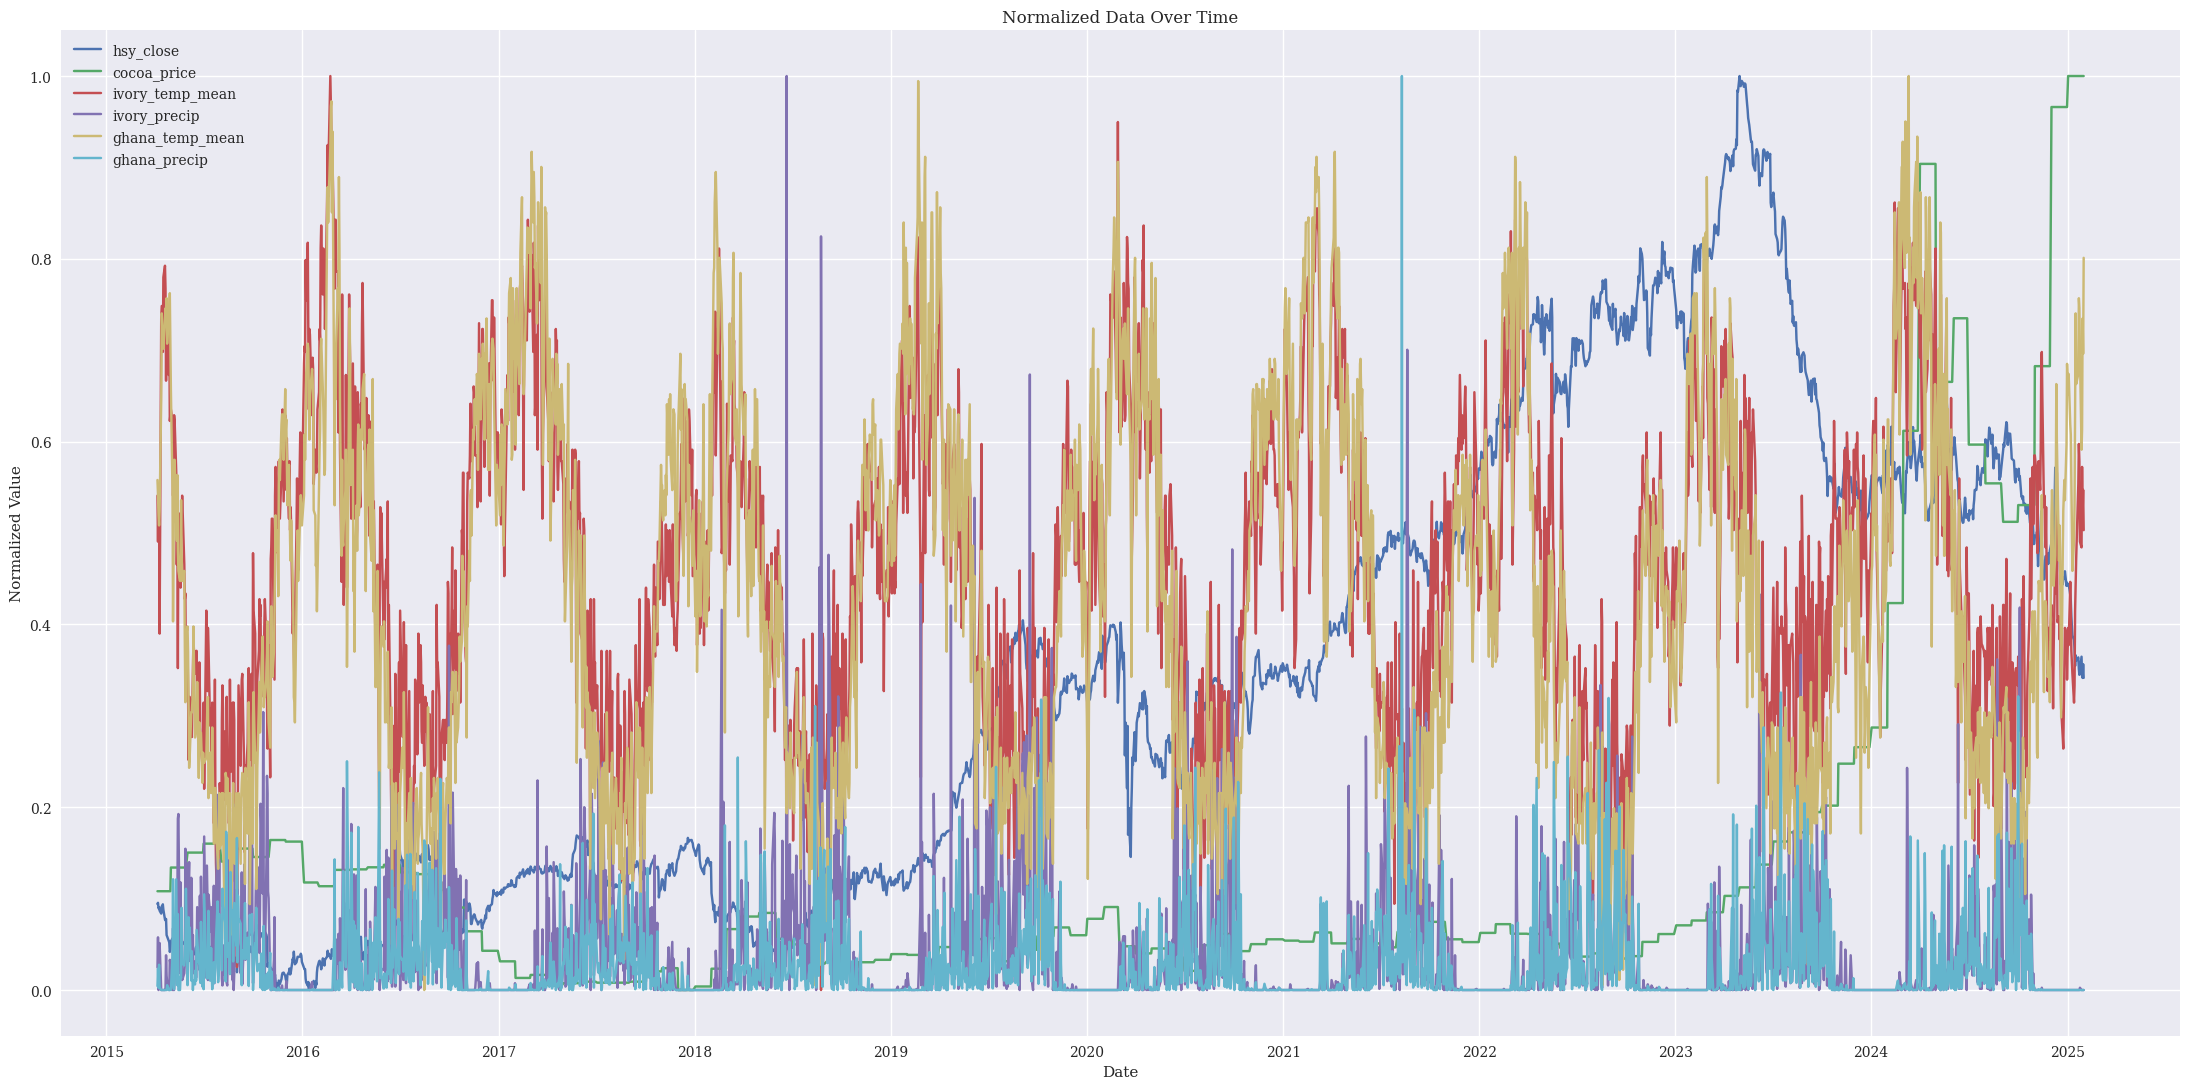

In [32]:
# Normalize all columns except the date
cols_to_normalize = [
    "hsy_close",
    "cocoa_price",
    "ivory_temp_mean", 
    "ivory_precip",
    "ghana_temp_mean",
    "ghana_precip"
]

scaler = MinMaxScaler()
df_normalized = final_merged_df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(final_merged_df[cols_to_normalize])

# Plotting
plt.figure(figsize=(22, 11))
for col in cols_to_normalize:
    plt.plot(final_merged_df['fixed_date'], df_normalized[col], label=col)

plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.title("Normalized Data Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()